In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://s3.nat-geo.ru/images/2019/4/10/a8e8a3c5ca7043089f8d42e5c50640af.max-2000x1000.jpg -O duck.jpg

--2020-12-28 20:57:30--  https://s3.nat-geo.ru/images/2019/4/10/a8e8a3c5ca7043089f8d42e5c50640af.max-2000x1000.jpg
Resolving s3.nat-geo.ru (s3.nat-geo.ru)... 146.185.192.186, 146.185.192.187
Connecting to s3.nat-geo.ru (s3.nat-geo.ru)|146.185.192.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276866 (270K) [image/jpeg]
Saving to: ‘duck.jpg’

duck.jpg            100%[===================>] 270.38K   335KB/s    in 0.8s    

2020-12-28 20:57:32 (335 KB/s) - ‘duck.jpg’ saved [276866/276866]



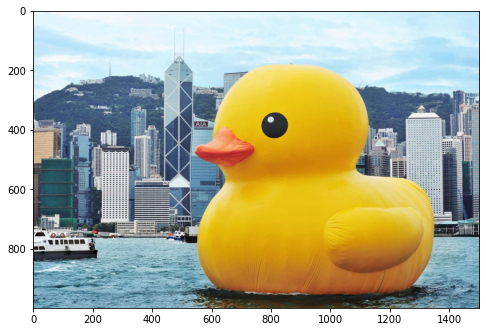

In [3]:
img = cv2.cvtColor(cv2.imread('duck.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

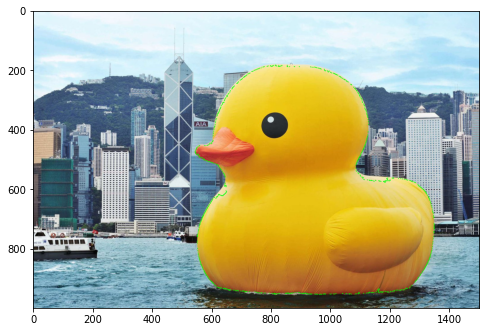

In [4]:
# Duck is yellow, so we search for colors like yellow
# Convert image in HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# Set the target color in HSV
color_target = cv2.cvtColor(np.uint8([[[255, 255, 0]]]), cv2.COLOR_RGB2HSV)
# Set the lower and upper bounds
color_lower = color_target[0][0][0] - 32, 80, 100
color_upper = color_target[0][0][0] + 32, 255, 255
# Find pixels with colors in the range and make a mask out of them
img_mask = cv2.inRange(img_hsv, np.array(color_lower), np.array(color_upper))
# Make an image ROI out of mask and convert it to gray
img_roi = cv2.bitwise_and(img_hsv, img_hsv, mask=img_mask)
img_roi = cv2.cvtColor(cv2.cvtColor(img_roi, cv2.COLOR_HSV2RGB), cv2.COLOR_RGB2GRAY)
# Get external contours from the ROI
contours, _ = cv2.findContours(img_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Get the longest contour array
contour = max(contours, key = len)
# Apply contours to the image
img_contours = img.copy()
cv2.drawContours(img_contours, contour, -1, (0, 255, 0), 2)
# Show the image with contours
plt.figure(figsize=(8, 8))
plt.imshow(img_contours)
plt.show()

In [5]:
M = cv2.moments(contour)
print(M)

{'m00': 453891.5, 'm10': 416740463.0, 'm01': 280241598.6666666, 'm20': 399755145555.0833, 'm11': 260500974335.79166, 'm02': 192381585584.75, 'm30': 399206164926226.8, 'm21': 253689436839917.44, 'm12': 180285599821297.3, 'm03': 141528881780109.1, 'mu20': 17124905725.84137, 'mu11': 3197161463.75766, 'mu02': 19354874083.765656, 'mu30': 724530598871.5625, 'mu21': 1001747903317.4023, 'mu12': -297527046821.26953, 'mu03': -1151483040010.9688, 'nu20': 0.0831235513658503, 'nu11': 0.015518883397795748, 'nu02': 0.09394772128022413, 'nu30': 0.005220073368537263, 'nu21': 0.007217359156727888, 'nu12': -0.002143612727951285, 'nu03': -0.008296165766974216}


In [6]:
print('Area: ', cv2.contourArea(contour))

try:
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  print('Cx: ', cx, ', Cy: ', cy)
except ZeroDivisionError:
  print('TBD ...')

Area:  453891.5
Cx:  918 , Cy:  617
